In [1]:
#First look at Neural Network using Keras
#Classifying 28*28 grayscale images of 10 digits into their categories (classes) 0-9
#Using MNIST dataset ( 60K training and 10K test examples -samples )


#Env prep -- conda install -c conda-forge keras
#conda create --name tensorflow 
#activate tensorflow
#pip install tensorflow



#Loading the dataset

from tensorflow.keras.datasets import mnist

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()

In [31]:
# training data shape 

train_images.shape
type(train_images)

numpy.ndarray

In [3]:
len(train_labels)

60000

In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [5]:
# test data shape 

test_images.shape

(10000, 28, 28)

In [6]:
len(test_labels)

10000

In [7]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

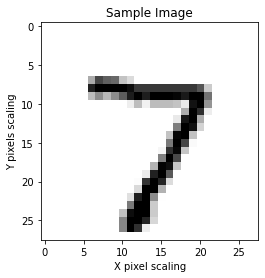

In [8]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
plt.title("Sample Image")
plt.xlabel("X pixel scaling")
plt.ylabel("Y pixels scaling")
 
sample_image = test_images[0]
plt.imshow(sample_image,cmap=plt.cm.binary)
plt.show()

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

In [10]:
model = keras.Sequential([layers.Dense(512,activation ="relu"),
                          layers.Dense(10,activation="softmax")
                         ])

# model -> 2 dense (FC) layers ,layer 1 : activation relu 
# layer 2 : softmax classification wih 10 classes (for 10 digits)

2022-06-13 15:57:01.930083: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(optimizer ="rmsprop",
              loss = "sparse_categorical_crossentropy",
              metrics=["accuracy"])

#RMSprop optimizer : The RMSprop optimizer is similar to the gradient descent algorithm with momentum. 
#sparse categorical crossentropy : when classes are mutually exclusive 
# fraction of images correctly classified

In [12]:
train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32")/255

#images shape : 60000,28,28 of type uint8 with values in [0,255] 
# reshape images to 60000,28*28 of type float32 with values in [0,1]

In [13]:
model.fit(train_images,train_labels,epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 0.2575 - accuracy: 0.9255
Epoch 2/10
469/469 [==============================] - 4s 8ms/step - loss: 0.1042 - accuracy: 0.9691
Epoch 3/10
469/469 [==============================] - 4s 7ms/step - loss: 0.0682 - accuracy: 0.9790
Epoch 4/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0500 - accuracy: 0.9847
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0371 - accuracy: 0.9891
Epoch 6/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0277 - accuracy: 0.9917
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0215 - accuracy: 0.9938
Epoch 8/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0129 - accuracy: 0.9961
Epoch 10/10
469/469 [==============================] - 4s 8ms/step - loss: 0.0098 - accuracy: 0.9972

In [14]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9799


In [15]:
print(f"test_acc is {test_acc}")

test_acc is 0.9799000024795532


In [16]:
image_test=mpimg.imread("test_sample.png")

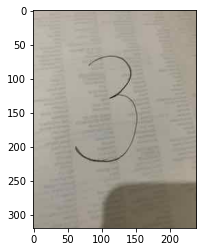

In [17]:
plt.imshow(image_test)

In [18]:
image_test.shape

(320, 240, 4)

In [19]:
from mnst_image_format_converter import imageprepare

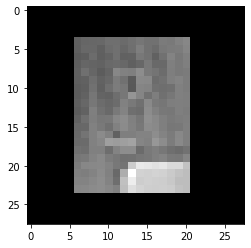

In [21]:
image_test = imageprepare('test_sample.png')
plt.imshow(image_test,cmap=plt.cm.binary )

In [41]:
import numpy as np
ImgNumpyData = np.array(image_test)

type(ImgNumpyData)
ImgNumpyData.shape

(784, 1)

In [43]:
ImgNumpyData = ImgNumpyData.reshape((1,784))
ImgNumpyData = ImgNumpyData.astype("float32")/255
prediction_test = model.predict(ImgNumpyData)

1/1 [==============================] - 0s 45ms/step


In [44]:
prediction_test

array([[0.05401333, 0.07533855, 0.08482042, 0.07700793, 0.08536631,
        0.25177357, 0.07199915, 0.15171   , 0.06127156, 0.08669911]],
      dtype=float32)